In [1]:
import os
import numpy as np
import pandas as pd
import glob

In [2]:
from trackml.dataset import load_event
from trackml.randomize import shuffle_hits
from trackml.score import score_event

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [4]:
%%bash
ls
pwd

LICENSE
README.md
RNN Track Finder.ipynb
Test RNN.ipynb
__pycache__
dbscan.ipynb
environment.yml
featurs.ipynb
final_trained_model
final_trained_model_v01
input
log_1528490875.692
log_1528490930.525281
log_1528490954.666062
log_1528504695.929373
loss_list
loss_list_full_model
loss_list_v01
models.py
process_data.py
scripts
simplePytorch.ipynb
tmp_loss_list
tmp_trained_model
train.py
utils.py
/Users/xju/PycharmProjects/trackingML


In [6]:
event_prefix = 'event000001000'
hits, cells, particles, truth = load_event(os.path.join('input/train_1', event_prefix))

In [7]:
type(hits)
hits.shape

(120939, 7)

In [8]:
mem_bytes = (hits.memory_usage(index=True).sum() 
             + cells.memory_usage(index=True).sum() 
             + particles.memory_usage(index=True).sum() 
             + truth.memory_usage(index=True).sum())
print('{} memory usage {:.2f} MB'.format(event_prefix, mem_bytes / 2**20))

event000001000 memory usage 18.46 MB


/global/project/projectdirs/m1092/xju/miniconda3/envs/py3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/global/project/projectdirs/m1092/xju/miniconda3/envs/py3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


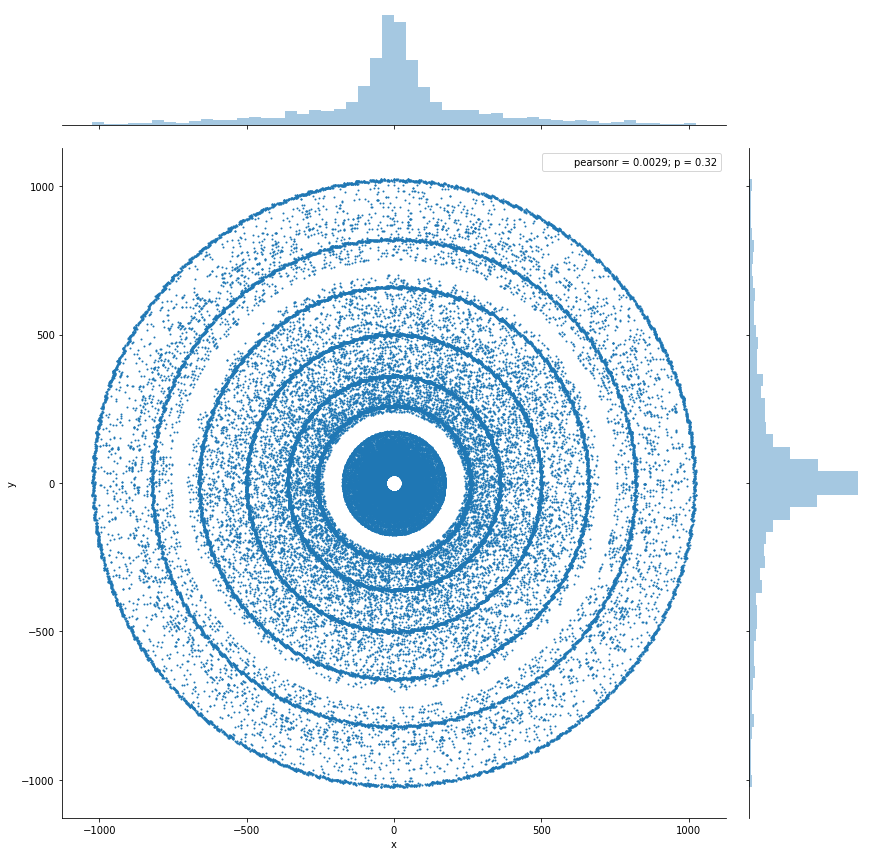

In [24]:
g = sns.jointplot(hits.x, hits.y, s=1, size=12)

/global/project/projectdirs/m1092/xju/miniconda3/envs/py3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/global/project/projectdirs/m1092/xju/miniconda3/envs/py3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


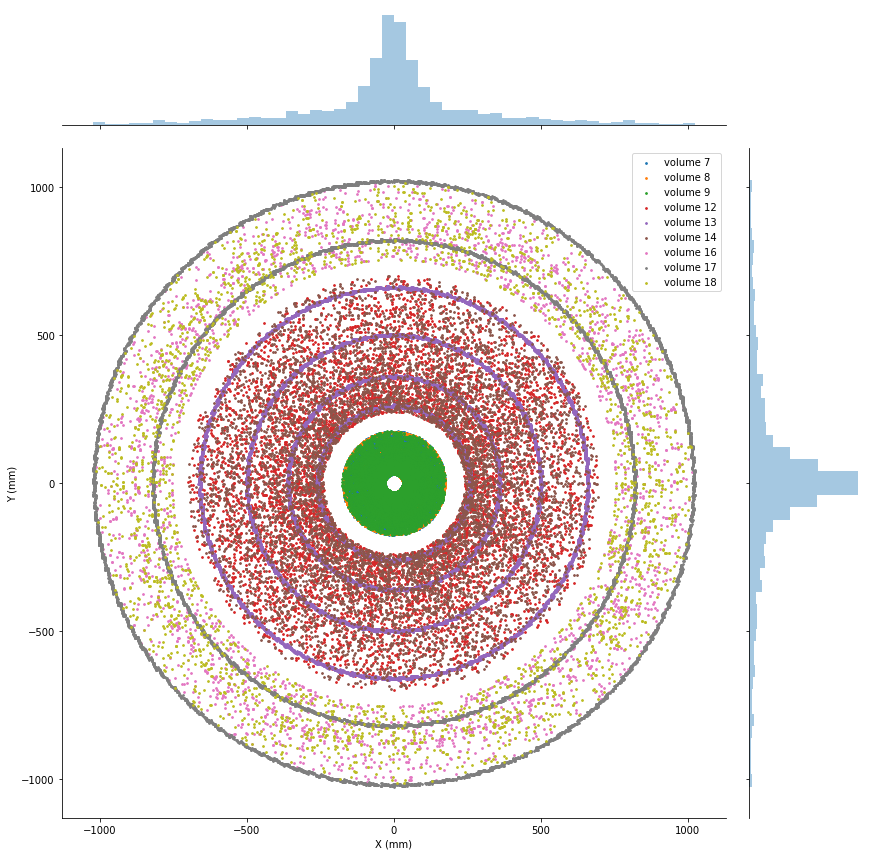

In [25]:
g = sns.jointplot(hits.x, hits.y, s=1, size=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.x, v.y, s=3, label='volume {}'.format(volume))
    
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

/global/project/projectdirs/m1092/xju/miniconda3/envs/py3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/global/project/projectdirs/m1092/xju/miniconda3/envs/py3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


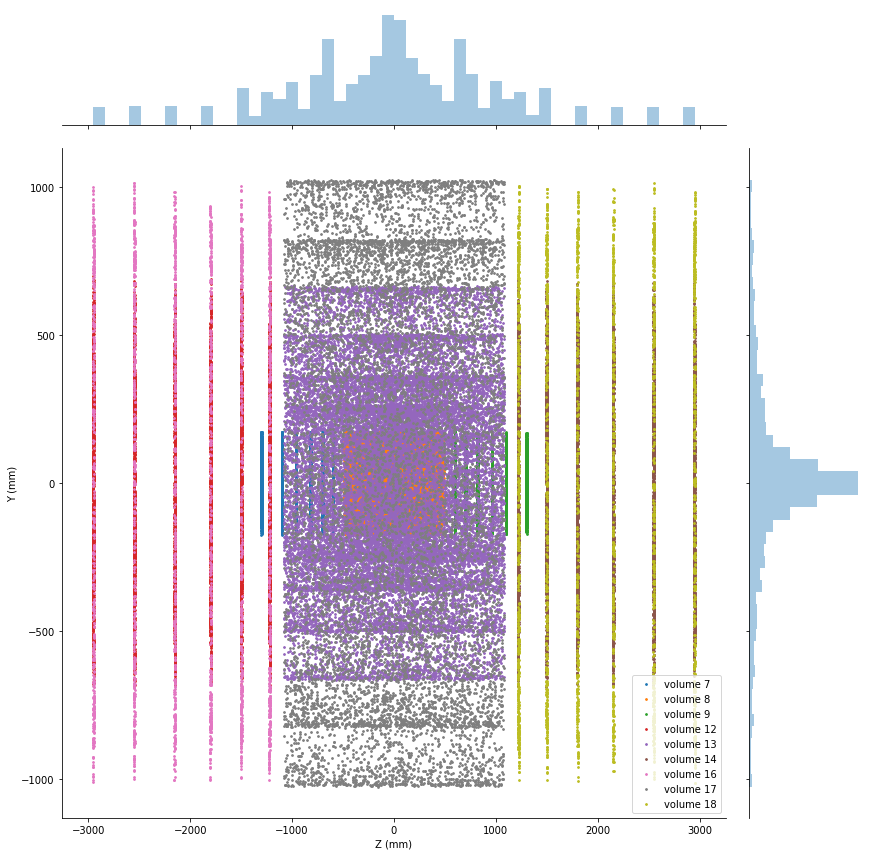

In [26]:
g = sns.jointplot(hits.z, hits.y, s=1, size=12)
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.z, v.y, s=3, label='volume {}'.format(volume))

plt.xlabel('Z (mm)')
plt.ylabel('Y (mm)')
plt.legend()
plt.show()

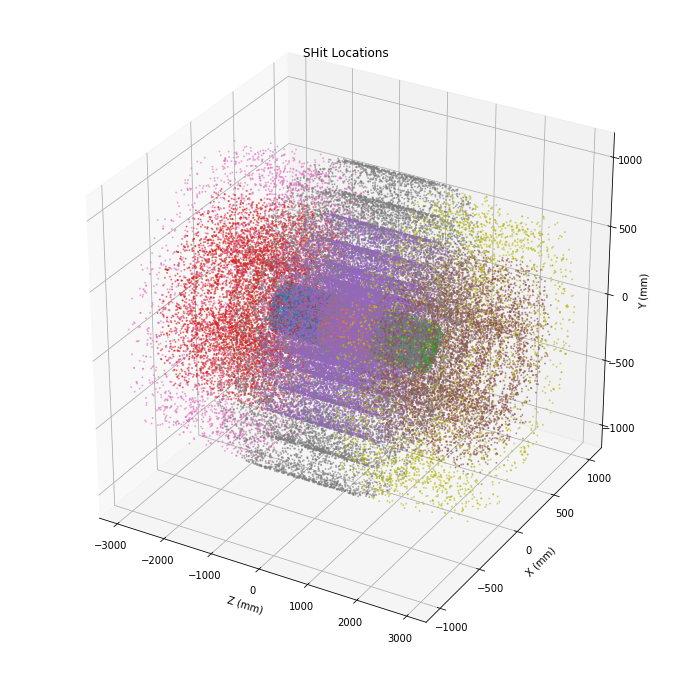

In [35]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
for volume in volumes:
    v = hits[hits.volume_id == volume]
    ax.scatter(v.z, v.x, v.y, s=1, label='volume {}'.format(volume), alpha=0.5)
    
ax.set_title('SHit Locations')
ax.set_xlabel('Z (mm)')
ax.set_ylabel('X (mm)')
ax.set_zlabel('Y (mm)')
plt.show()

In [36]:
detectors_df = pd.read_csv("../input/detectors.csv")
detectors_df.head()

,volume_id,layer_id,module_id,cx,cy,cz,rot_xu,rot_xv,rot_xw,rot_yu,...,rot_yw,rot_zu,rot_zv,rot_zw,module_t,module_minhu,module_maxhu,module_hv,pitch_u,pitch_v
0,7,2,1,-65.7965,-5.17830,-1502.5,0.078459,-0.996917,0.0,-0.996917,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
1,7,2,2,-139.8510,-6.46568,-1502.0,0.046183,-0.998933,0.0,-0.998933,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
2,7,2,3,-138.6570,-19.34190,-1498.0,0.138156,-0.990410,0.0,-0.990410,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
3,7,2,4,-64.1764,-15.40740,-1498.0,0.233445,-0.972370,0.0,-0.972370,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
4,7,2,5,-136.2810,-32.05310,-1502.0,0.228951,-0.973438,0.0,-0.973438,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625


In [8]:
import xgboost as xgb
from sklearn import preprocessing, cluster

In [10]:
scl = preprocessing.StandardScaler()
dbscan = cluster.DBSCAN(eps=0.0076, min_samples=1, algorithm='kd_tree', n_jobs=-1)

In [11]:
x = hits.x.values
y = hits.y.values
z = hits.z.values

r = np.sqrt(x**2 + y**2 + z**2)

x2 = x/r
y2 = y/r

r2 = np.sqrt(x**2 + y**2)
z2 = z/r2

In [13]:
def get_features(df, theta=0):
    x = df.x.values
    y = df.y.values
    z = df.z.values

    r = np.sqrt(x**2 + y**2 + z**2)

    x2 = x/r
    y2 = y/r

    r2 = np.sqrt(x**2 + y**2)
    z2 = z/r2
    
    df['x2'] = x2
    df['y2'] = y2
    df['z2'] = z2
    df['r'] = r2
    
    return df

In [14]:
transformed_hits = get_features(hits)

In [16]:
transformed_hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,x2,y2,z2,r
0,1,-64.409897,-7.163700,-1502.5,7,2,1,-0.042829,-0.004763,-23.184208,64.807045
1,2,-55.336102,0.635342,-1502.5,7,2,1,-0.036804,0.000423,-27.150467,55.339748
2,3,-83.830498,-1.143010,-1502.5,7,2,1,-0.055707,-0.000760,-17.921406,83.838287
3,4,-96.109100,-8.241030,-1502.5,7,2,1,-0.063835,-0.005474,-15.576118,96.461777
4,5,-62.673599,-9.371200,-1502.5,7,2,1,-0.041676,-0.006232,-23.709833,63.370335


In [15]:
link_table = transformed_hits.join(truth[['particle_id']])[['x2', 'y2', 'z2', 'particle_id']]
link_table.head()

,x2,y2,z2,particle_id
0,-0.042829,-0.004763,-23.184208,0
1,-0.036804,0.000423,-27.150467,22525763437723648
2,-0.055707,-0.000760,-17.921406,0
3,-0.063835,-0.005474,-15.576118,297237712845406208
4,-0.041676,-0.006232,-23.709833,418835796137607168


In [17]:
print(len(link_table[link_table['particle_id'] == 0]))
print(len(link_table[link_table['particle_id'] != 0]))

17634
103305


In [19]:
sub_sample = link_table[link_table['particle_id'] != 0]

No handles with labels found to put in legend.


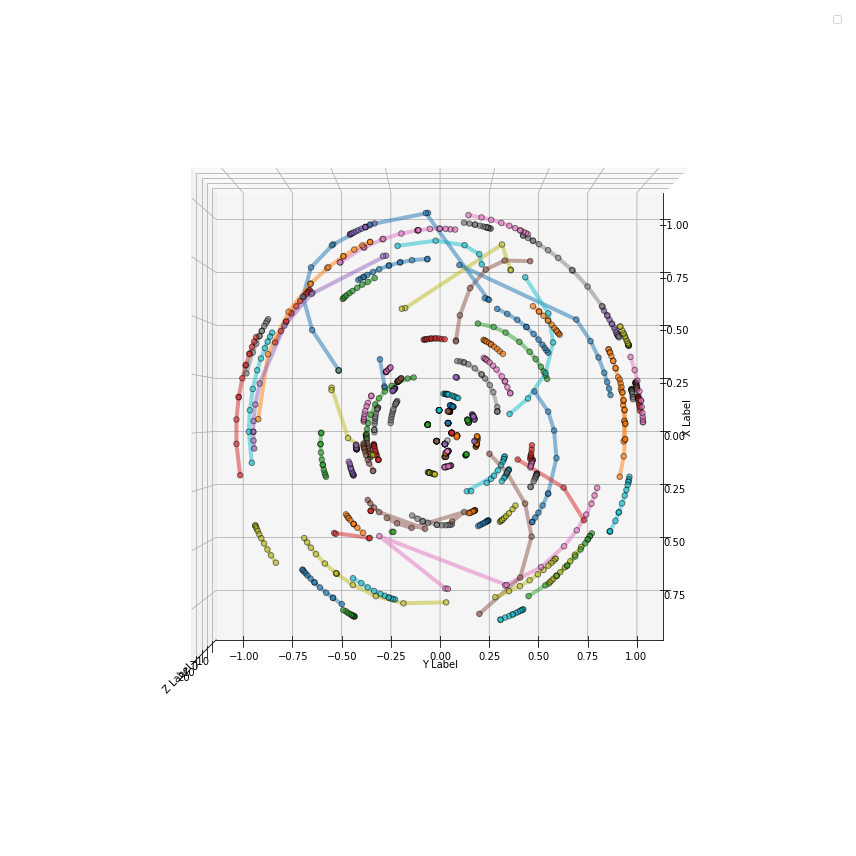

In [21]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
for sample_particle_id in np.unique(sub_sample['particle_id'].values)[:100]:
    data = np.array(sub_sample[sub_sample['particle_id'] == sample_particle_id][['x2', 'y2', 'z2']])
    ax.plot(data[:,0], data[:,1], data[:,2], '-', alpha=0.5, lw=4)
    ax.scatter(data[:,0], data[:,1], data[:,2], marker='o', edgecolor='black', s=np.ones(len(data))*30, alpha=0.5)
    
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")
ax.view_init(elev=90, azim=0)
ax.legend()

fig.tight_layout()
plt.show()

No handles with labels found to put in legend.


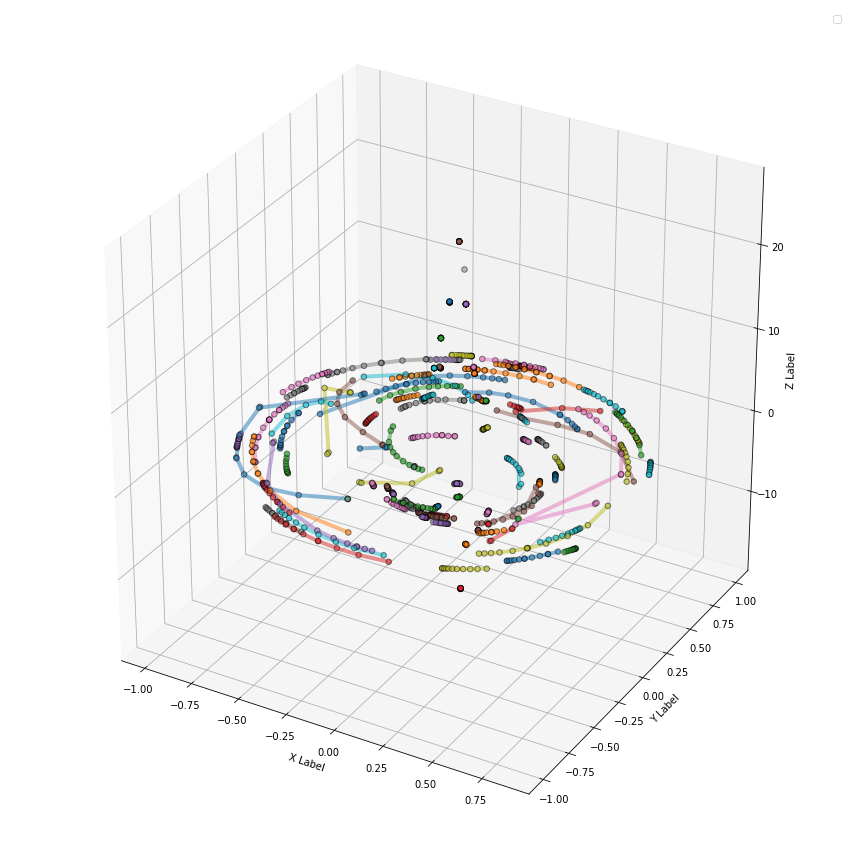

In [22]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
for sample_particle_id in np.unique(sub_sample['particle_id'].values)[:100]:
    data = np.array(sub_sample[sub_sample['particle_id'] == sample_particle_id][['x2', 'y2', 'z2']])
    ax.plot(data[:,0], data[:,1], data[:,2], '-', alpha=0.5, lw=4)
    ax.scatter(data[:,0], data[:,1], data[:,2], marker='o', edgecolor='black', s=np.ones(len(data))*30, alpha=0.5)
    
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")
# ax.view_init(elev=90, azim=0)
ax.legend()

fig.tight_layout()
plt.show()

In [8]:
train = np.unique([p.split('-')[0] for p in sorted(glob.glob('input/train_1/**'))])
test = np.unique([p.split('-')[0] for p in sorted(glob.glob('input/test/**'))])
det = pd.read_csv('input/detectors.csv')
sub = pd.read_csv('input/sample_submissitrain = np.unique([p.split('-')[0] for p in sorted(glob.glob('input/train_1/**'))])on.csv')
print(len(train), len(test), len(det), len(sub))

1770 125 18728 13741466


In [43]:
det.head()

,volume_id,layer_id,module_id,cx,cy,cz,rot_xu,rot_xv,rot_xw,rot_yu,...,rot_yw,rot_zu,rot_zv,rot_zw,module_t,module_minhu,module_maxhu,module_hv,pitch_u,pitch_v
0,7,2,1,-65.7965,-5.17830,-1502.5,0.078459,-0.996917,0.0,-0.996917,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
1,7,2,2,-139.8510,-6.46568,-1502.0,0.046183,-0.998933,0.0,-0.998933,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
2,7,2,3,-138.6570,-19.34190,-1498.0,0.138156,-0.990410,0.0,-0.990410,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
3,7,2,4,-64.1764,-15.40740,-1498.0,0.233445,-0.972370,0.0,-0.972370,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
4,7,2,5,-136.2810,-32.05310,-1502.0,0.228951,-0.973438,0.0,-0.973438,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625


In [6]:
from sklearn import cluster, preprocessing

In [10]:
scl = preprocessing.StandardScaler()
dbscan = cluster.DBSCAN(eps=0.00715, min_samples=1, algorithm='auto', n_jobs=-1)
df_test = []
e = test[0]
hits, cells = load_event(e, parts=['hits', 'cells'])

In [11]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-60.826698,-4.16023,-1502.5,7,2,1
1,2,-84.729401,-7.29528,-1502.5,7,2,1
2,3,-42.592999,5.04875,-1502.5,7,2,1
3,4,-62.497501,2.72992,-1502.5,7,2,1
4,5,-66.203697,-10.60120,-1502.5,7,2,1


In [15]:
cells.head()

,hit_id,ch0,ch1,value
0,1,155,550,0.268630
1,2,180,978,0.316736
2,3,0,214,0.241720
3,4,15,570,0.277643
4,5,275,655,0.083079


In [14]:
hits['event_id'] = int(e[-9:])

In [19]:
cells = cells.groupby(by=['hit_id'])['ch0', 'ch1', 'value'].agg(['mean']).reset_index()

In [20]:
cells.head()

,hit_id,ch0,ch1,value
,,mean,mean,mean
0,1,155.000000,550.000000,0.268630
1,2,180.000000,978.000000,0.316736
2,3,0.000000,214.000000,0.241720
3,4,15.000000,570.000000,0.277643
4,5,274.666667,654.333333,0.098860


In [23]:
cells.columns = ['hit_id', 'ch0', 'ch1', 'value']

In [24]:
cells.head()

,hit_id,ch0,ch1,value
0,1,155.000000,550.000000,0.268630
1,2,180.000000,978.000000,0.316736
2,3,0.000000,214.000000,0.241720
3,4,15.000000,570.000000,0.277643
4,5,274.666667,654.333333,0.098860


In [25]:
hits = pd.merge(hits, cells, how='left', on='hit_id')

In [26]:
col = [c for c in hits.columns if c not in ['event_id', 'hit_id', 'particle_id']]

In [27]:
col

['x', 'y', 'z', 'volume_id', 'layer_id', 'module_id', 'ch0', 'ch1', 'value']

In [28]:
x = hits.x.values
y = hits.y.values
z = hits.z.values
r = np.sqrt(x**2 + y**2 + z**2)
hits['x2'] = x/r
hits['y2'] = y/r
hits['z2'] = z/np.sqrt(x**2 + y**2)
hits['particle_id'] = dbscan.fit_predict(scl.fit_transform(hits[['x2', 'y2', 'z2']].values))

In [30]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,event_id,ch0,ch1,value,x2,y2,z2,particle_id
0,1,-60.826698,-4.16023,-1502.5,7,2,1,0,155.000000,550.000000,0.268630,-0.040450,-0.002767,-24.643751,0
1,2,-84.729401,-7.29528,-1502.5,7,2,1,0,180.000000,978.000000,0.316736,-0.056302,-0.004848,-17.667557,1
2,3,-42.592999,5.04875,-1502.5,7,2,1,0,0.000000,214.000000,0.241720,-0.028337,0.003359,-35.030510,2
3,4,-62.497501,2.72992,-1502.5,7,2,1,0,15.000000,570.000000,0.277643,-0.041560,0.001815,-24.018059,3
4,5,-66.203697,-10.60120,-1502.5,7,2,1,0,274.666667,654.333333,0.098860,-0.044019,-0.007049,-22.409616,4


In [31]:
aa = scl.fit_transform(hits[['x2', 'y2', 'z2']].values)

In [35]:
aa.shape

(119016, 3)

In [41]:
df_aa = pd.DataFrame(aa)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aaaf1c61e80>,
      dtype=object)

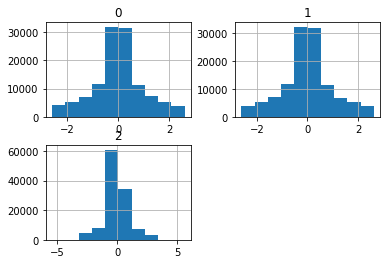

In [42]:
df_aa.hist()

In [ ]:
df_test.append(hists[['event_id', 'hit_id', 'particle_id']].copy())